# Example graph

## Define state

In [2]:
from dotenv import load_dotenv
from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict

load_dotenv(verbose=True)

True

In [3]:
class State(TypedDict):
    messages: list[AnyMessage]
    extra_field: int

## Define graph structure

In [4]:
from langchain_core.messages import AIMessage


def node(state: State):
    messages = state["messages"]
    new_message = AIMessage("Hello!")

    return {"messages": messages + [new_message], "extra_field": 10}

In [5]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)
graph_builder.add_node("node", node)
graph_builder.set_entry_point("node")
graph = graph_builder.compile()

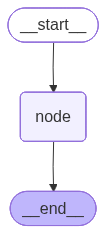

In [6]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

## Use graph

In [7]:
from langchain_core.messages import HumanMessage

result = graph.invoke({"messages": [HumanMessage("Hi")]})
result

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello!', additional_kwargs={}, response_metadata={})],
 'extra_field': 10}

In [8]:
for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello!


# Process state updates with reducers

In [9]:
from typing_extensions import Annotated


def add(left, right):
    """Can also import `add` from the `operator` built-in."""
    return left + right


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add]
    extra_field: int

In [10]:
def node(state: State):
    new_message = AIMessage("Hello!")
    return {"messages": [new_message], "extra_field": 10}

In [11]:
from langgraph.graph import START

graph = StateGraph(State).add_node('node', node).add_edge(START, "node").compile()

result = graph.invoke({"messages": [HumanMessage("Hi")]})

for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello!


## MessagesState

In [12]:
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    extra_field: int


def node(state: State):
    new_message = AIMessage("Hello!")
    return {"messages": [new_message], "extra_field": 10}


graph = StateGraph(State).add_node(node).set_entry_point("node").compile()

In [13]:
input_message = {"role": "user", "content": "Hi"}
result = graph.invoke({"messages": [input_message]})

for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello!
